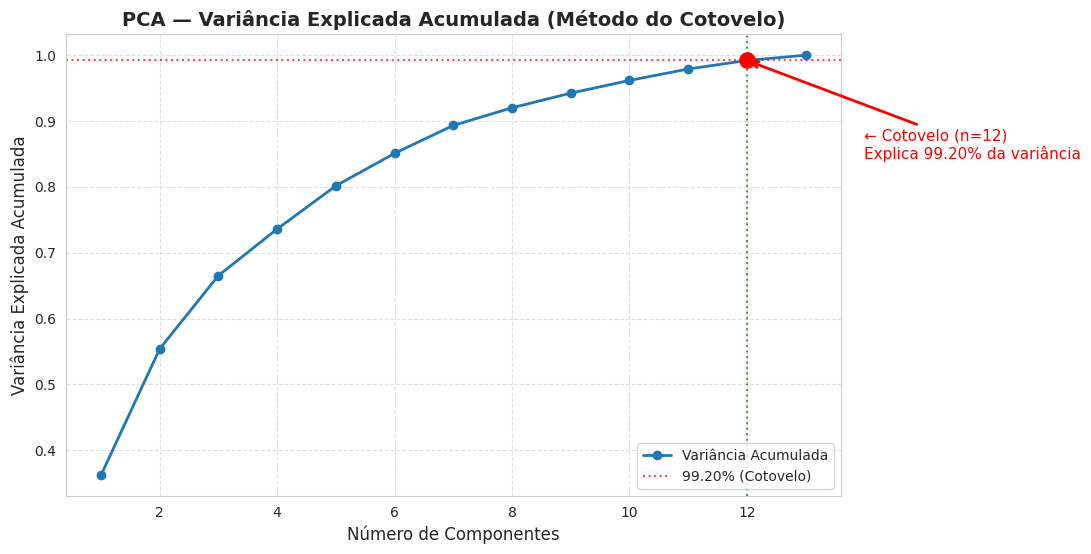

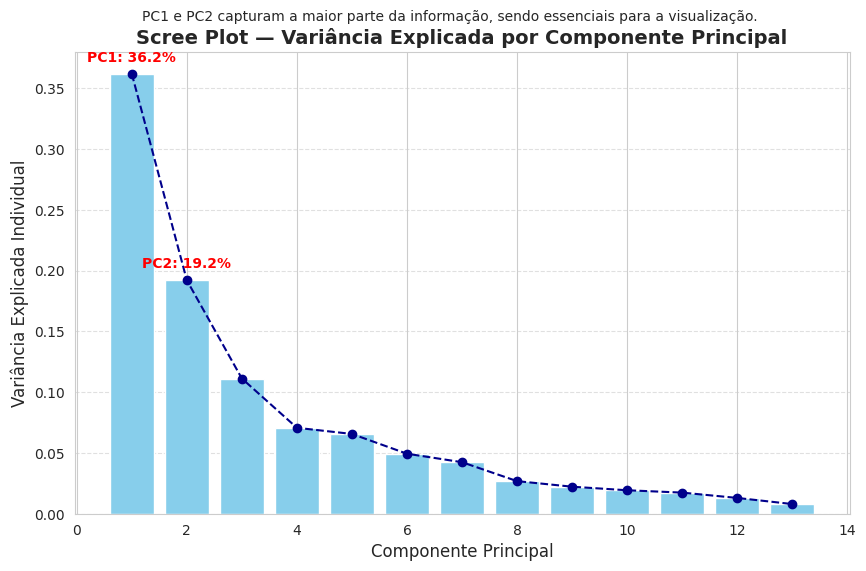

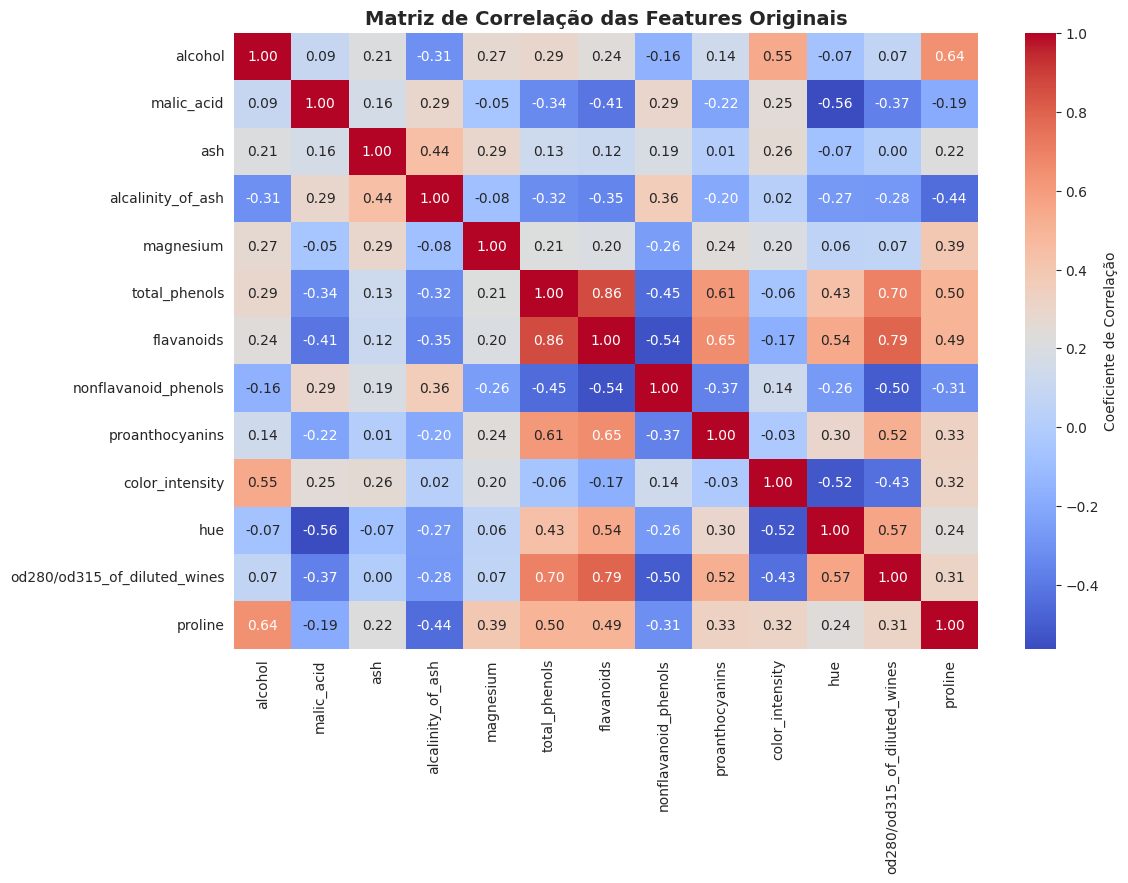

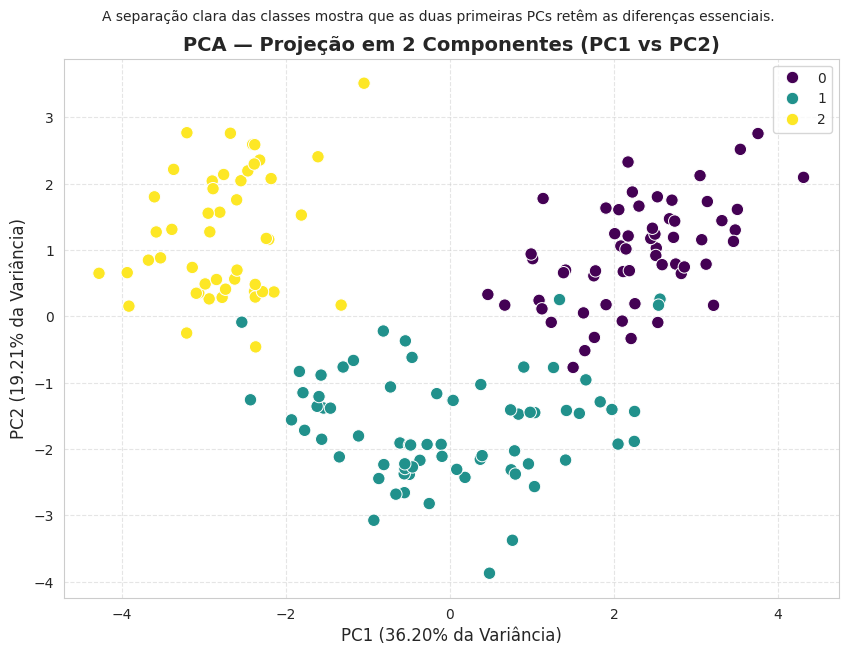

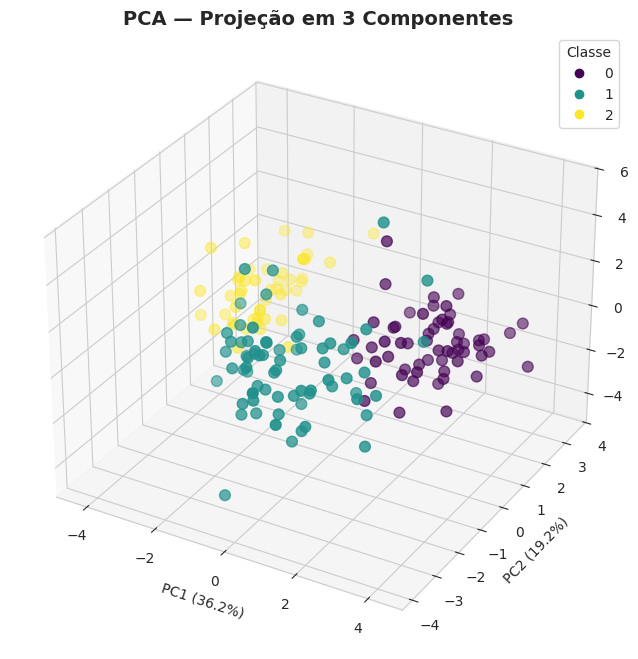

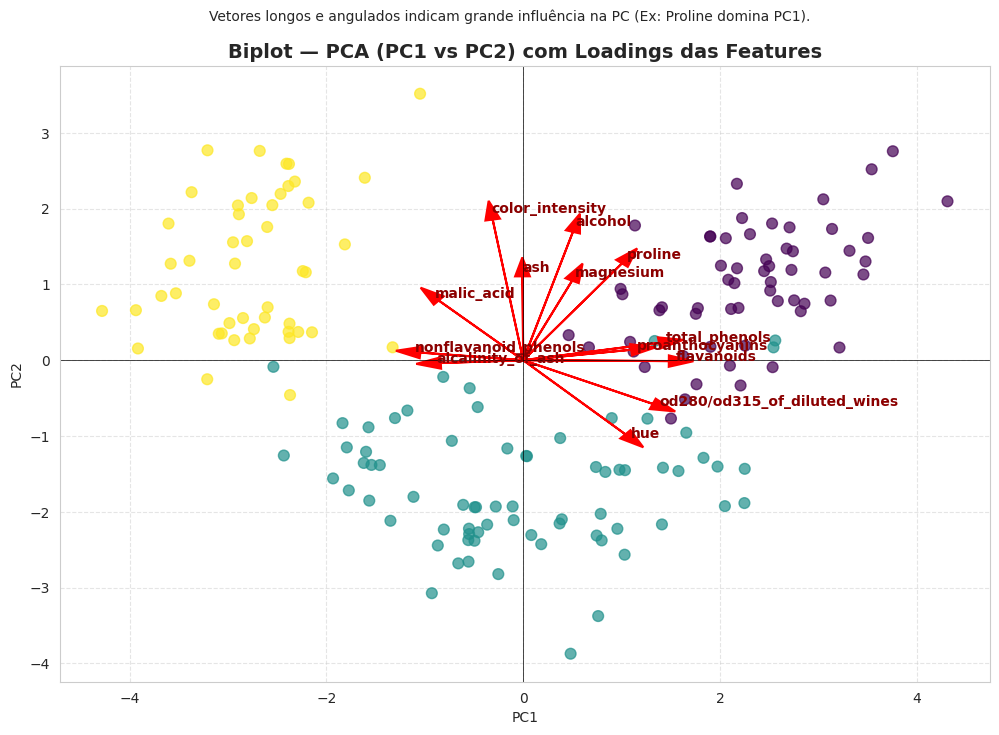

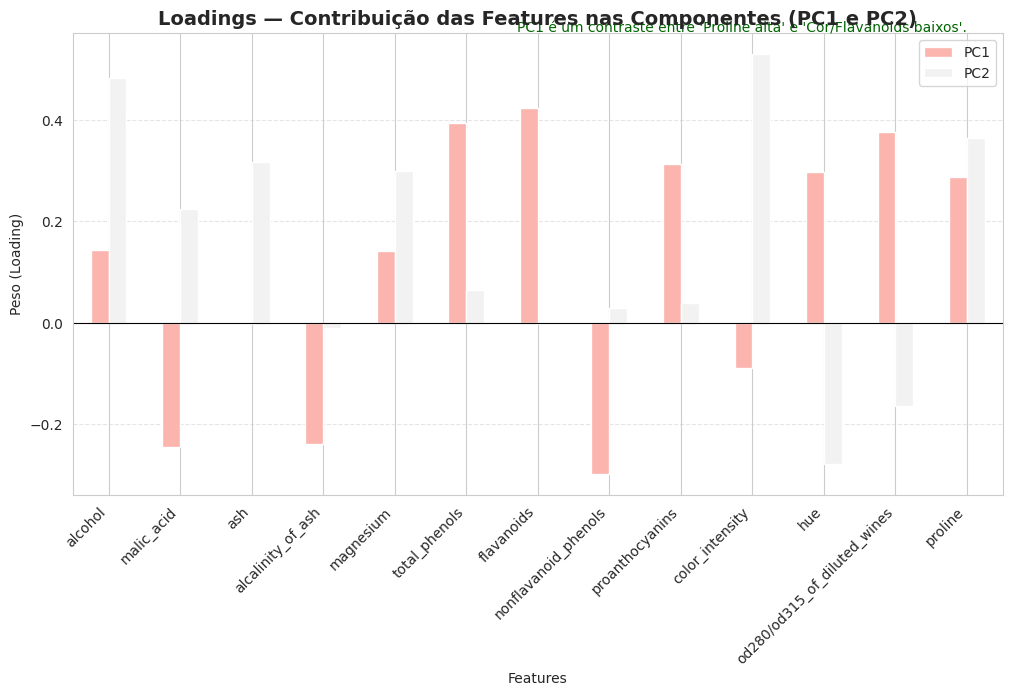

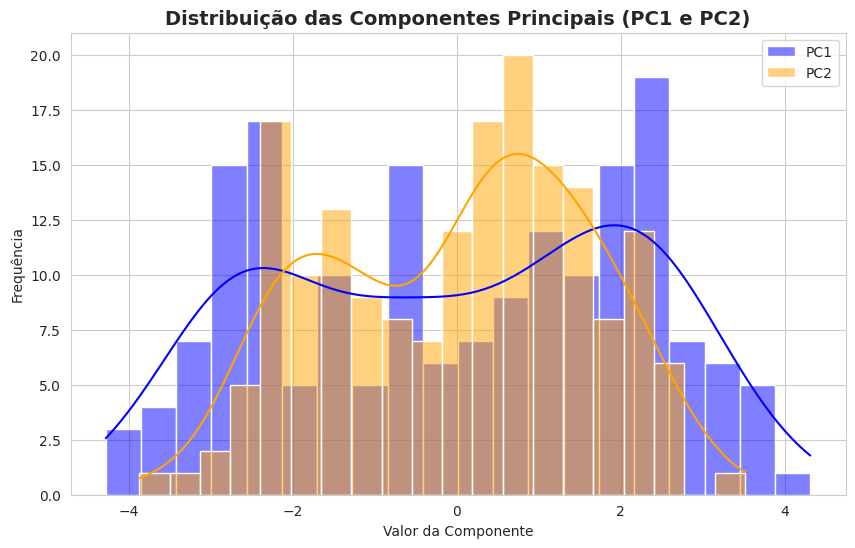

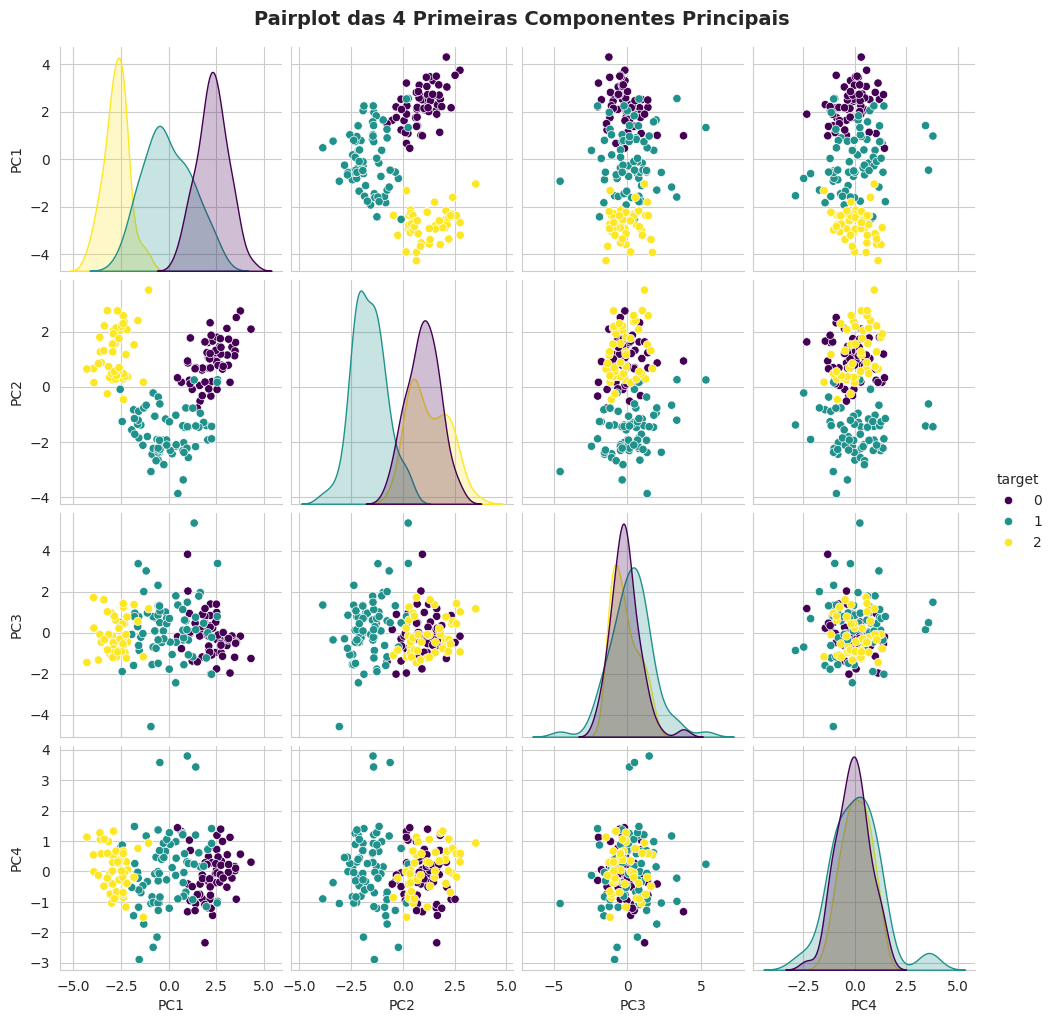

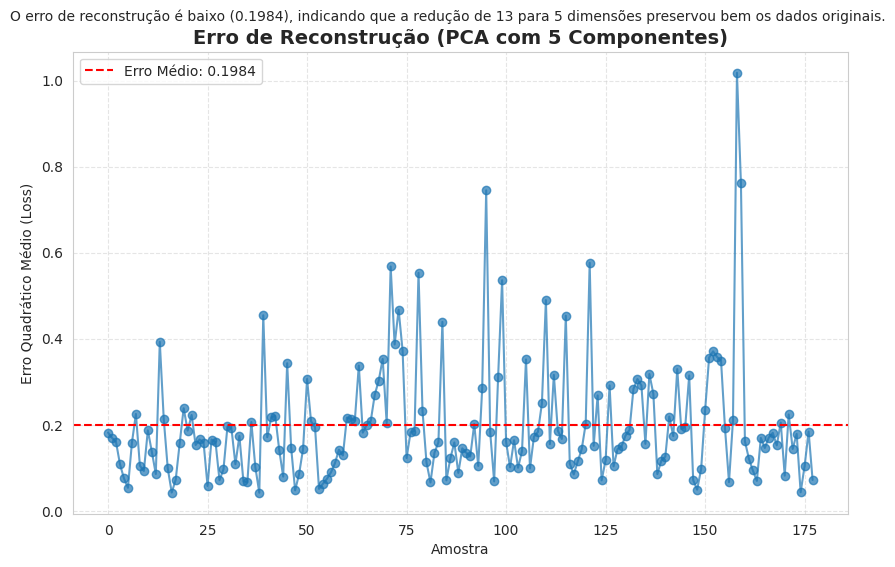


--- Resultados PCA Sumarizados ---
O 'cotovelo' (elbow) foi detectado no componente 12.
Com 12 componentes, 99.20% da variância é explicada.
Erro médio de reconstrução (com 5 componentes): 0.1984.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configurações de estilo para melhor visualização
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# ============================================================
# 1. Carregar dataset real (Wine)
# ============================================================
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names

# ============================================================
# 2. Padronizar os dados (PCA exige padronização/escalonamento)
# ============================================================
# StandardScaler garante que todas as features tenham média 0 e desvio-padrão 1,
# evitando que features com maior escala dominem as Componentes Principais.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ============================================================
# 3. PCA completo (todas as componentes)
# ============================================================
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)
explained = np.cumsum(pca_full.explained_variance_ratio_) # Variância acumulada

# ============================================================
# 4. Encontrar automaticamente o "cotovelo"
# ============================================================
# O ponto de cotovelo é onde o ganho marginal de variância explicada começa a diminuir.
diffs = np.diff(explained)
elbow_idx = np.argmin(diffs) + 1

# ============================================================
# 5. Gráfico do cotovelo com seta e anotação (Cumulative Explained Variance)
# ============================================================
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained)+1), explained, marker='o', linewidth=2, label='Variância Acumulada')
plt.title("PCA — Variância Explicada Acumulada (Método do Cotovelo)", fontsize=14, fontweight='bold')
plt.xlabel("Número de Componentes", fontsize=12)
plt.ylabel("Variância Explicada Acumulada", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=explained[elbow_idx-1], color='red', linestyle=':', alpha=0.7, label=f'{explained[elbow_idx-1]*100:.2f}% (Cotovelo)')
plt.axvline(x=elbow_idx, color='green', linestyle=':', alpha=0.7)

# Seta apontando para o cotovelo
plt.annotate(
    f"← Cotovelo (n={elbow_idx})\nExplica {explained[elbow_idx-1]*100:.2f}% da variância",
    xy=(elbow_idx, explained[elbow_idx-1]),
    xytext=(elbow_idx+2, explained[elbow_idx-1] - 0.15),
    arrowprops=dict(arrowstyle="->", lw=2, color="red"),
    fontsize=11,
    color="red"
)

plt.scatter(elbow_idx, explained[elbow_idx-1], color="red", s=120, zorder=5)
plt.legend(loc='lower right')
plt.show()
# 

# ============================================================
# 6. Scree Plot — variância individual por componente
# ============================================================
variance_ratio = pca_full.explained_variance_ratio_
components = range(1, len(variance_ratio)+1)

plt.figure(figsize=(10,6))
plt.bar(components, variance_ratio, color='skyblue', label='Variância Individual')
plt.plot(components, variance_ratio, color='darkblue', marker='o', linestyle='--', label='Conexão dos pontos')

plt.title("Scree Plot — Variância Explicada por Componente Principal", fontsize=14, fontweight='bold')
plt.xlabel("Componente Principal", fontsize=12)
plt.ylabel("Variância Explicada Individual", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.text(1, variance_ratio[0] + 0.01, f'PC1: {variance_ratio[0]*100:.1f}%', ha='center', color='red', fontweight='bold')
plt.text(2, variance_ratio[1] + 0.01, f'PC2: {variance_ratio[1]*100:.1f}%', ha='center', color='red', fontweight='bold')
plt.suptitle("PC1 e PC2 capturam a maior parte da informação, sendo essenciais para a visualização.", y=0.95, fontsize=10)

plt.show()

# ============================================================
# 7. Heatmap da matriz de correlação original
# ============================================================
plt.figure(figsize=(12,8))
corr_matrix = pd.DataFrame(X, columns=feature_names).corr()
sns.heatmap(corr_matrix,
            annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Coeficiente de Correlação'})
plt.title("Matriz de Correlação das Features Originais", fontsize=14, fontweight='bold')
plt.show()
# 

# ============================================================
# 8. Scatter 2D — PC1 vs PC2
# ============================================================
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
# O parâmetro `hue=y` colore os pontos de acordo com a classe de vinho original.
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=y, palette="viridis", s=80, legend='full')
plt.title("PCA — Projeção em 2 Componentes (PC1 vs PC2)", fontsize=14, fontweight='bold')
plt.xlabel(f"PC1 ({pca2.explained_variance_ratio_[0]*100:.2f}% da Variância)", fontsize=12)
plt.ylabel(f"PC2 ({pca2.explained_variance_ratio_[1]*100:.2f}% da Variância)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.suptitle("A separação clara das classes mostra que as duas primeiras PCs retêm as diferenças essenciais.", y=0.95, fontsize=10)
plt.show()
# 

# ============================================================
# 9. Scatter 3D — PC1 vs PC2 vs PC3
# ============================================================
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2],
                     c=y, cmap="viridis", s=60)
ax.set_title("PCA — Projeção em 3 Componentes", fontsize=14, fontweight='bold')
ax.set_xlabel(f"PC1 ({pca3.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({pca3.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({pca3.explained_variance_ratio_[2]*100:.1f}%)")
plt.legend(*scatter.legend_elements(), title="Classe")
plt.show()
# 

# ============================================================
# 10. Biplot — PC1 vs PC2 + vetores das features (Loadings)
# ============================================================
plt.figure(figsize=(12,8))
plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap="viridis", s=60, alpha=0.7)

# Fatores de escala para desenhar os vetores de loadings
scale_factor = 3.5

for i, feature in enumerate(feature_names):
    # Coordenadas dos loadings
    x_loading = pca2.components_[0, i] * scale_factor
    y_loading = pca2.components_[1, i] * scale_factor

    plt.arrow(0, 0, x_loading, y_loading,
              color='red', head_width=0.15, head_length=0.25, linewidth=1.5)
    plt.text(x_loading * 1.05, y_loading * 1.05,
             feature, color='darkred', fontsize=10, fontweight='bold')

plt.title("Biplot — PCA (PC1 vs PC2) com Loadings das Features", fontsize=14, fontweight='bold')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.suptitle("Vetores longos e angulados indicam grande influência na PC (Ex: Proline domina PC1).", y=0.95, fontsize=10)
plt.show()
# 

# ============================================================
# 11. Loadings — contribuição das features nas PCs (Gráfico de Barras)
# ============================================================
loadings = pd.DataFrame(pca2.components_.T,
                        columns=['PC1','PC2'],
                        index=feature_names)

plt.figure(figsize=(12,6))
loadings.plot(kind='bar', ax=plt.gca(), cmap='Pastel1')
plt.title("Loadings — Contribuição das Features nas Componentes (PC1 e PC2)", fontsize=14, fontweight='bold')
plt.xlabel("Features")
plt.ylabel("Peso (Loading)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.text(12, loadings['PC1'].max() + 0.15,
         "PC1 é um contraste entre 'Proline alta' e 'Cor/Flavanoids baixos'.",
         fontsize=10, color='darkgreen', horizontalalignment='right')
plt.axhline(0, color='black', linewidth=0.8)

plt.show()

# ============================================================
# 12. Distribuição das componentes principais
# ============================================================
plt.figure(figsize=(10,6))
sns.histplot(X_pca2[:,0], kde=True, color='blue', label='PC1', bins=20)
sns.histplot(X_pca2[:,1], kde=True, color='orange', label='PC2', bins=20)
plt.title("Distribuição das Componentes Principais (PC1 e PC2)", fontsize=14, fontweight='bold')
plt.xlabel("Valor da Componente")
plt.ylabel("Frequência")
plt.legend()
plt.show()

# ============================================================
# 13. Pairplot das 4 primeiras PCs
# ============================================================
df_pca = pd.DataFrame(X_pca_full[:, :4], columns=['PC1','PC2','PC3','PC4'])
df_pca['target'] = y

sns.pairplot(df_pca, hue='target', palette='viridis', diag_kind='kde')
plt.suptitle("Pairplot das 4 Primeiras Componentes Principais", y=1.02, fontsize=14, fontweight='bold')
plt.show()
# 

# ============================================================
# 14. Erro de reconstrução (qualidade da redução)
# ============================================================
# Avalia a perda de informação ao usar n_components=5.
pca_recon = PCA(n_components=5)
X_reduced = pca_recon.fit_transform(X_scaled)
X_reconstructed = pca_recon.inverse_transform(X_reduced)

# Erro quadrático médio por amostra
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2, axis=1)

plt.figure(figsize=(10,6))
plt.plot(reconstruction_error, marker='o', linestyle='-', alpha=0.7)
plt.title("Erro de Reconstrução (PCA com 5 Componentes)", fontsize=14, fontweight='bold')
plt.xlabel("Amostra")
plt.ylabel("Erro Quadrático Médio (Loss)")
plt.grid(True, linestyle='--', alpha=0.5)

mean_error = reconstruction_error.mean()
plt.axhline(mean_error, color='red', linestyle='--', label=f'Erro Médio: {mean_error:.4f}')
plt.legend()
plt.suptitle(f"O erro de reconstrução é baixo ({mean_error:.4f}), indicando que a redução de 13 para 5 dimensões preservou bem os dados originais.", y=0.95, fontsize=10)
plt.show()

print("\n--- Resultados PCA Sumarizados ---")
print(f"O 'cotovelo' (elbow) foi detectado no componente {elbow_idx}.")
print(f"Com {elbow_idx} componentes, {explained[elbow_idx-1]*100:.2f}% da variância é explicada.")
print(f"Erro médio de reconstrução (com 5 componentes): {mean_error:.4f}.")